# Teste Z

Vamos investigar como a faixa etária e o estado de origem das mulheres influenciam a nota da redação no ENEM. Para isso, utilizaremos a poderosa ferramenta estatística chamada Análise de Variância (ANOVA). A ANOVA nos permite analisar a variabilidade dos dados e determinar se a nota da redação é significativamente diferente entre as diferentes faixas de idade e estados.

---


**Hipótese Nula (H0): Não há diferença significativa na nota da redação entre as faixas de idade e os estados. Ou seja, a faixa de idade e o estado não influenciam a nota da redação.**

**Hipótese Alternativa (H1): Há diferença significativa na nota da redação entre as faixas de idade e os estados. Ou seja, a faixa de idade e/ou o estado influenciam a nota da redação.**


---

Para realizar a análise, dividiremos a idade das mulheres em faixas e construiremos um modelo ANOVA que leva em consideração a interação entre as variáveis "faixa de idade" e "estado". O resultado do teste fornecerá informações valiosas sobre o impacto de cada fator na nota da redação.

Para complementar a análise, criaremos um gráfico de barras que visualiza a média da nota da redação para cada combinação de faixa de idade e estado. Esse gráfico nos permitirá identificar padrões visuais e facilitar a interpretação dos resultados do teste.

Com esse estudo, pretendemos entender se há diferenças significativas no desempenho na redação do ENEM entre mulheres de diferentes faixas etárias e estados, e se a interação entre esses fatores exerce alguma influência sobre a nota.

In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

---
# Explicação:

---
* **import pandas as pd**: Importa a biblioteca pandas, fundamental para trabalhar com dados estruturados em Python. Ela permite ler, manipular e analisar dados em DataFrames, que são como tabelas.
* **import statsmodels.formula.api as sm**: Importa o módulo statsmodels.formula.api, abreviado como sm, que contém ferramentas para realizar análises estatísticas como regressão e ANOVA.
* **import matplotlib.pyplot as plt**: Importa a biblioteca matplotlib.pyplot, abreviada como plt, que é usada para criar gráficos.

In [2]:
# 1. Carregar a tabela
data = pd.read_csv('enem_2019.csv')  # Lê os dados do arquivo CSV "enem_2019.csv" e os armazena no DataFrame 'data'.

---
# Explicação:

---
* **data = pd.read_csv('enem_2019.csv')**: Assume que os dados já foram carregados em um DataFrame chamado data, provavelmente utilizando a função pd.read_csv para ler os dados de um arquivo CSV chamado "enem_2019.csv".

In [3]:
# 2. Filtrar as mulheres
df_mulheres = data[data["sexo"] == "F"]  # Cria um novo DataFrame 'df_mulheres' com apenas as linhas do DataFrame original 'data' onde o sexo é "F" (feminino).

---
# Explicação:

---
* **df_mulheres = data[data["sexo"] == "F"]**: Cria um novo DataFrame chamado df_mulheres que contém apenas as linhas do DataFrame original data onde o valor na coluna "sexo" é igual a "F" (feminino). Isso filtra apenas as mulheres dos dados.

In [5]:
# 3. Criar faixas de idade
df_mulheres.loc[:, "faixa_idade"] = pd.cut(df_mulheres["idade"], bins=[15, 18, 21, 25, 30, 50], labels=["15-17", "18-20", "21-25", "25-30", "30+"])  # Cria uma nova coluna 'faixa_idade' no DataFrame 'df_mulheres' categorizando a idade em faixas usando a função 'pd.cut'.

---
# Explicação:

---
* **df_mulheres.loc[:, "faixa_idade"] = pd.cut(df_mulheres["idade"], bins=[15, 18, 21, 25, 30, 50], labels=["15-17", "18-20", "21-25", "25-30", "30+"])**: Essa linha é crucial para o teste ANOVA, pois transforma a variável "idade" em uma variável categórica:
 * **pd.cut**: A função pd.cut da biblioteca pandas é usada para dividir dados numéricos em intervalos (bins) e atribuir rótulos (labels) a cada intervalo.
 * **df_mulheres["idade"]**: Define a coluna "idade" como os dados que serão categorizados.
 * **bins=[15, 18, 21, 25, 30, 50]**: Define os limites das faixas de idade, criando as seguintes faixas:
   * 15-17
   * 18-20
   * 21-25
   * 25-30
   * 30-50
 * **labels=["15-17", "18-20", "21-25", "25-30", "30+"]**: Define os rótulos que serão atribuídos a cada faixa de idade.
 * **df_mulheres["faixa_idade"] = ...**: Cria uma nova coluna chamada "faixa_idade" no DataFrame df_mulheres com as faixas de idade categorizadas.
 * df_mulheres.loc[:, "faixa_idade"]: A indexação loc garante que você está modificando o DataFrame original, especificando todas as linhas (:) e a coluna faixa_idade.

In [6]:
# 4. Criar o modelo ANOVA
modelo = sm.ols('nota_redacao ~ C(faixa_idade) * C(estado)', data=df_mulheres)  # Cria um modelo de regressão linear com a função 'ols' da biblioteca statsmodels, usando a fórmula 'nota_redacao ~ C(faixa_idade) * C(estado)' para analisar a influência da faixa de idade e do estado na nota_redacao, considerando a interação entre as variáveis.

---
# Explicação:

---
* **modelo = sm.ols('nota_redacao ~ C(faixa_idade) * C(estado)', data=df_mulheres)**: Cria um modelo de regressão linear com a função ols do módulo sm para analisar a influência da faixa de idade e do estado na nota da redação.
 * **nota_redacao ~ C(faixa_idade) * C(estado)**: Define a fórmula do modelo. A variável dependente é nota_redacao. As variáveis independentes são faixa_idade e estado, e o operador * indica que queremos analisar a interação entre essas variáveis.
 * **C(faixa_idade) * C(estado)**: A função C() transforma as variáveis categóricas faixa_idade e estado em variáveis dummy (variáveis binárias que representam cada categoria).
 * **data=df_mulheres**: Define que o modelo usará os dados do DataFrame df_mulheres.

In [7]:
# 5. Ajustar o modelo e obter os resultados
resultados = modelo.fit()  # Ajusta o modelo aos dados usando a função 'fit' e armazena os resultados em 'resultados'.

---
# Explicação:

---
* **resultados = modelo.fit()**: Ajusta o modelo aos dados usando a função fit, que estima os parâmetros do modelo e armazena os resultados em resultados.

In [13]:
# 9. Imprimir os resultados do ANOVA
print(resultados.summary())  # Imprime um resumo dos resultados da análise ANOVA, incluindo estatísticas como os valores p, a estatística F, os coeficientes e os intervalos de confiança.

                            OLS Regression Results                            
Dep. Variable:           nota_redacao   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     820.0
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:22:37   Log-Likelihood:            -1.5014e+07
No. Observations:             2265627   AIC:                         3.003e+07
Df Residuals:                 2265492   BIC:                         3.003e+07
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

---
# Explicação:

---
* **print(resultados.summary())**: Imprime um resumo dos resultados do modelo ajustado, incluindo a tabela ANOVA, coeficientes do modelo, estatísticas de ajuste e outras informações relevantes para interpretar o modelo.


---

# O que a ANOVA Está Analisando:


---


O teste ANOVA faz entender se a idade das mulheres e o estado onde elas fizeram o ENEM influenciam a nota da redação. Vai comparar as notas da redação entre os grupos de mulheres divididos por faixa de idade e estado.

## Hipóteses:


---


* **Hipótese Nula (H0)**: Não há diferença significativa na nota da redação entre as faixas de idade e os estados. Ou seja, a faixa de idade e o estado não influenciam a nota da redação.

* **Hipótese Alternativa (H1)**: Há diferença significativa na nota da redação entre as faixas de idade e os estados. Ou seja, a faixa de idade e/ou o estado influenciam a nota da redação.


---


## Resultados do Teste:


---


* **R-squared**: 0.046 - Isso significa que o modelo explica apenas 4.6% da variação na nota da redação. Em outras palavras, a faixa de idade e o estado juntos não são grandes preditores da nota da redação.
* **Valores p**: Concentre-se nos valores p para cada variável (faixa de idade, estado e a interação entre elas).


---


## Significância:


---


* Se o valor p for menor que 0.05, rejeitamos a hipótese nula (H0). Isso significa que há evidências suficientes para concluir que a variável influencia significativamente a nota da redação.
* Se o valor p for maior que 0.05, não rejeitamos a hipótese nula (H0). Isso significa que não há evidências suficientes para concluir que a variável influencia a nota da redação.

---

## Interpretando a Tabela:

---

* **Intercept:** O coeficiente de interceptação (580.5764) indica a nota média da redação para a faixa de referência (15-17) no estado de referência.

## Faixa de Idade:

* Todos os valores p para as faixas de idade são menores que 0.05, o que significa que a faixa de idade tem um impacto significativo na nota da redação.
Os coeficientes negativos indicam que a nota da redação tende a diminuir conforme a idade aumenta.

* Por exemplo, mulheres na faixa de idade 18-20 tendem a ter notas 32.4255 pontos mais baixas do que mulheres na faixa de referência (15-17) no estado de referência.

---

## Estado:


* Todos os estados têm valores p menores que 0.05, o que significa que o estado tem um impacto significativo na nota da redação.
* Os coeficientes indicam a diferença na nota da redação média para cada estado em relação ao estado de referência (o estado que não tem coeficiente no modelo).

---

## Interação:

* O valor p da interação entre a faixa de idade e o estado é significativo (menor que 0.05). Isso indica que o efeito da faixa de idade na nota da redação varia de acordo com o estado. Ou seja, a relação entre a idade e a nota da redação não é a mesma em todos os estados.

# Conclusão:

* **O teste ANOVA indica que a faixa de idade e o estado das mulheres influenciam significativamente a nota da redação no ENEM. O efeito da idade na nota da redação varia de acordo com o estado, o que sugere que fatores específicos de cada estado podem influenciar a nota. No entanto, o modelo explica apenas 4.6% da variação na nota da redação, o que indica que outros fatores também podem estar influenciando a nota.**

---


# Glossário do resultado:


---
* **Dep. Variable: nota_redacao**: A variável dependente do modelo, que é a nota da redação.
* **R-squared: 0.046**: O R-quadrado (ou coeficiente de determinação) indica a proporção da variância da variável dependente (nota da redação) que é explicada pelo modelo. Neste caso, o modelo explica apenas 4.6% da variância.
* **Model: OLS**: O tipo de modelo usado é a Regressão Linear Ordinária (OLS, Ordinary Least Squares), que é um método comum para ajustar modelos de regressão linear.
* **Adj. R-squared: 0.046**: O R-quadrado ajustado é uma versão do R-quadrado que considera o número de variáveis independentes no modelo. Ele é uma medida mais precisa do poder preditivo do modelo.
* **Method: Least Squares: O método usado para estimar os parâmetros do modelo é o método de mínimos quadrados.
* **F-statistic: 820.0**: A estatística F é uma medida da variância explicada pelo modelo em relação à variância não explicada. Um valor alto da estatística F indica que o modelo é um bom preditor dos dados.
* **Prob (F-statistic): 0.00**: O valor p associado à estatística F. Um valor p menor que 0.05 indica que o modelo é significativo, ou seja, que pelo menos uma das variáveis independentes influencia a variável dependente.
* **Log-Likelihood: -1.5014e+07**: A log-verossimilhança do modelo, que é uma medida de quão bem o modelo se ajusta aos dados.
* **No. Observations: 2265627**: O número de observações no DataFrame usado para ajustar o modelo.
* **AIC: 3.003e+07**: O Critério de Informação de Akaike (AIC) é uma medida de qualidade do modelo que penaliza modelos com mais parâmetros. Modelos com AIC menor são considerados melhores.
* **Df Residuals: 2265492**: O número de graus de liberdade dos resíduos (erros) do modelo.
* **BIC: 3.003e+07**: O Critério de Informação Bayesiana (BIC) é outra medida de qualidade do modelo que penaliza modelos com mais parâmetros.
* **Df Model: 134**: O número de graus de liberdade do modelo, que é o número de variáveis independentes no modelo.
* **Covariance Type**: nonrobust: O tipo de matriz de covariância dos erros.
* **Intercept**: O coeficiente de intercepção do modelo.
* **C(faixa_idade)[T.18-20]**: O coeficiente para a variável 'faixa_idade' quando a faixa de idade é "18-20". A notação "[T.18-20]" indica que esse coeficiente se refere à categoria "18-20" da variável 'faixa_idade'.
* **C(estado)[T.AL]**: O coeficiente para a variável 'estado' quando o estado é "AL". A notação "[T.AL]" indica que esse coeficiente se refere à categoria "AL" da variável 'estado'.
* **coef**: O coeficiente do modelo para a respectiva variável.
* **std err**: O erro padrão do coeficiente.
* **t**: A estatística t do teste t para o coeficiente.
* **P>|t|**: O valor p do teste t para o coeficiente.
[0.025 0.975]: O intervalo de confiança de 95% para o coeficiente.

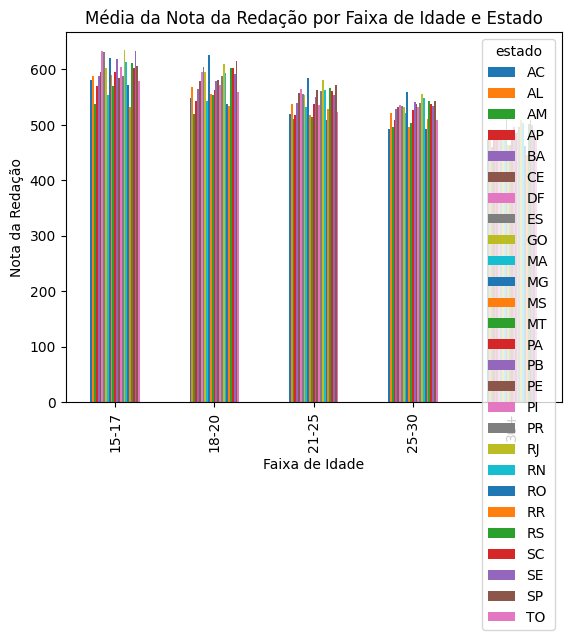

In [9]:
# 10. Criar gráfico de barras
media_notas = df_mulheres.groupby(["faixa_idade", "estado"])["nota_redacao"].mean().unstack()  # Calcula a média da nota da redação por faixa de idade e estado usando a função 'groupby' e 'mean' e organiza os resultados em uma tabela usando 'unstack'.
media_notas.plot(kind="bar")  # Cria um gráfico de barras com a função 'plot', usando o tipo de gráfico 'bar'.
plt.xlabel("Faixa de Idade")  # Define o rótulo do eixo x como "Faixa de Idade".
plt.ylabel("Nota da Redação")  # Define o rótulo do eixo y como "Nota da Redação".
plt.title("Média da Nota da Redação por Faixa de Idade e Estado")  # Define o título do gráfico.
plt.show()  # Exibe o gráfico.

---
# Explicação:

---
* **media_notas = df_mulheres.groupby(["faixa_idade", "estado"])["nota_redacao"].mean().unstack()**: Calcula a média da nota da redação para cada combinação de faixa de idade e estado:
 * **df_mulheres.groupby(["faixa_idade", "estado"])**: Agrupa os dados do DataFrame df_mulheres por faixa_idade e estado.
 * **["nota_redacao"].mean()**: Calcula a média da coluna nota_redacao para cada grupo.
 * **.unstack()**: Reorganiza os dados agrupados em uma tabela com as faixas de idade como linhas e os estados como colunas.
* **media_notas.plot(kind="bar")**: Cria um gráfico de barras usando a função plot do DataFrame media_notas, com o tipo de gráfico 'bar'.
* **plt.xlabel("Faixa de Idade"), plt.ylabel("Nota da Redação"), plt.title("Média da Nota da Redação por Faixa de Idade e Estado")**: Define os rótulos dos eixos e o título do gráfico.
* **plt.show()**: Exibe o gráfico na tela.

---
# Analisando o grafico:

---
**O gráfico mostra a média da nota da redação no ENEM por faixa de idade e estado. Podemos observar alguns padrões interessantes:**

* **Geralmente, a nota da redação é mais alta para mulheres de 18 a 20 anos:** As barras para essa faixa de idade tendem a ser mais altas do que as outras faixas, tanto em cada estado quanto em média.

* **As notas tendem a diminuir conforme a idade aumenta:** Em geral, as médias das notas da redação tendem a diminuir para as faixas de idade mais altas, sugerindo que a idade pode influenciar o desempenho na redação.

* **A nota da redação varia consideravelmente entre os estados:** As barras para cada estado mostram variações significativas nas médias, indicando que o estado também tem um impacto na nota da redação.

* **Diferenças entre os estados:** O gráfico permite comparar diretamente a nota da redação média para cada faixa de idade em cada estado. Você pode identificar estados onde as mulheres tendem a ter notas mais altas ou mais baixas, em relação à média nacional.

**Observações:**

* **Interação:** É importante notar que a influência da faixa de idade na nota da redação parece variar de acordo com o estado, como destacado no teste ANOVA. Isso indica que a relação entre a idade e a nota da redação não é uniforme em todos os estados.

* **Outras variáveis:** O gráfico mostra apenas a relação entre a idade, o estado e a nota da redação. É importante lembrar que outros fatores podem influenciar o desempenho na redação, como o nível socioeconômico, a escolaridade, a região, etc.

**Para continuar a análise:**

* **Investigar a interação:** Realizar uma análise mais aprofundada para entender a interação entre a faixa de idade e o estado, examinando os coeficientes do modelo ANOVA e realizando testes de comparação de médias (**como teste t de duas amostras**) para identificar diferenças específicas entre os estados.
Analisar outros fatores: Investigar o impacto de outras variáveis que podem influenciar a nota da redação, como nível socioeconômico, escolaridade, acesso a recursos educacionais, etc.

---


O gráfico e a análise do ANOVA fornecem uma primeira visão sobre a influência da idade e do estado na nota da redação. No entanto, uma análise mais aprofundada é necessária para entender completamente os fatores que contribuem para o desempenho na redação do ENEM.

---


# Glossário com as palavras chaves:


---
* **pandas**: Biblioteca Python para manipulação de dados em formato tabular (DataFrames).
* **statsmodels.formula.api**: Módulo da biblioteca statsmodels que fornece funções para realizar análise de regressão e testes de hipóteses.
* **sm**: Apelido para o módulo statsmodels.formula.api.
* **pd.read_csv**: Função para ler dados de um arquivo CSV e armazená-los em um DataFrame.
* **pd.cut**: Função para categorizar dados numéricos em faixas.
* **sm.ols**: Função para criar um modelo de regressão linear.
* **modelo**: Nome da variável que armazena o modelo ANOVA.
* **resultados**: Nome da variável que armazena os resultados do ajuste do modelo.
* **print**: Função para imprimir mensagens no console.
* **data**: Nome da variável que armazena o DataFrame com os dados.
* **df_mulheres**: Nome da variável que armazena o DataFrame filtrado com dados de mulheres.
* **nota_redacao**: Nome da coluna que representa a nota da redação no DataFrame.
* **idade**: Nome da coluna que representa a idade no DataFrame.
* **estado**: Nome da coluna que representa o estado no DataFrame.
* **faixa_idade**: Nome da coluna criada para categorizar a idade em faixas.
* **C()**: Função para transformar variáveis categóricas em variáveis dummy.
* *: Operador para indicar interação entre variáveis.
* **fit**: Função para ajustar o modelo aos dados.
* **summary**: Função para gerar um resumo dos resultados do modelo.
* **groupby**: Função para agrupar dados por uma ou mais colunas.
* **mean**: Função para calcular a média de um grupo de dados.
* **unstack**: Função para reorganizar dados agrupados em uma tabela.
* **plt.xlabel**: Função para definir o rótulo do eixo x.
* **plt.ylabel**: Função para definir o rótulo do eixo y.
* **plt.title**: Função para definir o título do gráfico.
* **plt.show**: Função para exibir o gráfico.
* **plt.plot**: Função para criar um gráfico.
* **kind="bar"**: Define o tipo de gráfico como barras.

---

# Observação:


---
* O resumo do modelo ANOVA (impresso pela função summary()) fornece informações sobre o efeito da faixa de idade e do estado na nota da redação. O valor p para cada variável indica a significância do efeito.
* O gráfico de barras visualiza a média da nota da redação por faixa de idade e estado, permitindo uma comparação visual do desempenho entre os grupos.

* É importante considerar o contexto dos dados e o tamanho da amostra ao interpretar os resultados do ANOVA.
* O ANOVA é uma ferramenta poderosa para analisar a influência de múltiplas variáveis independentes em uma variável dependente, mas é crucial garantir que os dados atendam às premissas do teste (normalidade, homogeneidade da variância, independência).